# CIFAR 10 - Categorical Classification

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

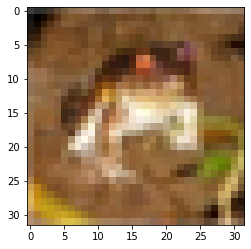

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[0]
plt.imshow(digit)
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.231372549 0.243137255 0.247058824 ... 0.482352941 0.360784314 0.282352941]


> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 3개의 Hidden Layers & 2816개의 Nodes
 - Dropout Layer

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
CIFAR.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 7,409,546
Trainable params: 7,409,546
Non-trainable params: 0
____________________________________________

> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 15분

In [ ]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 200,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/200
313/313 [==============================] - 4s 10ms/step - loss: 2.1094 - accuracy: 0.2231 - val_loss: 1.8800 - val_accuracy: 0.3104
Epoch 2/200
313/313 [==============================] - 3s 9ms/step - loss: 1.9170 - accuracy: 0.2975 - val_loss: 1.8511 - val_accuracy: 0.3420
Epoch 3/200
313/313 [==============================] - 3s 9ms/step - loss: 1.8770 - accuracy: 0.3111 - val_loss: 1.8321 - val_accuracy: 0.3478
Epoch 4/200
313/313 [==============================] - 3s 9ms/step - loss: 1.8428 - accuracy: 0.3237 - val_loss: 1.7733 - val_accuracy: 0.3689
Epoch 5/200
313/313 [==============================] - 3s 9ms/step - loss: 1.8047 - accuracy: 0.3391 - val_loss: 1.7565 - val_accuracy: 0.3856
Epoch 6/200
313/313 [==============================] - 3s 9ms/step - loss: 1.7888 - accuracy: 0.3490 - val_loss: 1.7433 - val_accuracy: 0.3860
Epoch 7/200
313/313 [==============================] - 3s 9ms/step - loss: 1.7696 - accuracy: 0.3557 - val_loss: 1.7270 - val_accuracy: 0.391

> ## 4) 학습 결과 시각화

* Loss Visualization

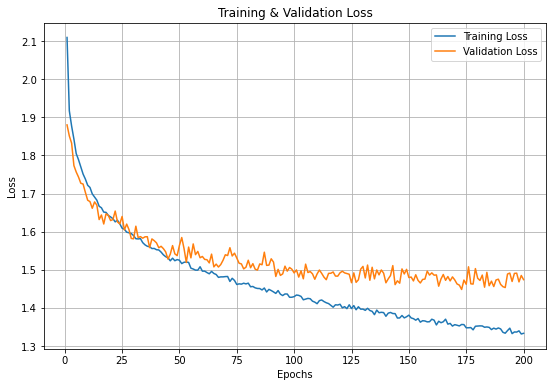

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['loss'])
plt.plot(epochs, Hist_CIFAR.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = CIFAR.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 1.4660 - accuracy: 0.4882
Loss = 1.46604
Accuracy = 0.48820


> ## 6) Model Predict

* Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(CIFAR.predict(X_test[:1,:]))

[[0.01648789  0.014980646 0.044826932 0.30783007  0.055562038 0.43702057  0.06274499  0.018875849 0.028832095 0.012838898]]


* Class

In [ ]:
print(np.argmax(CIFAR.predict(X_test[:1,:])))

5


# 
# 
# 
# The End
# 
# 
# 